<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week09_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (2141720025)

Diah Putri Nofianti (2141720054)

In [104]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week09"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# **Dilasi**

In [106]:
img = cv.imread(f'{path}/plat nomer.jpg')

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV.

In [107]:
def dilasi(img):
    # Buat SED cross 3x3
    sed = np.ones((3, 3), np.uint8)

    # Dapatkan dimensi citra
    if len(img.shape) == 2:
        height, width = img.shape
    elif len(img.shape) == 3:
        height, width, channels = img.shape

    # Inisialisasi citra hasil dilasi
    dilated_img = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height-1):
        for j in range(1, width-1):
            if len(img.shape) == 2:
                region = img[i-1:i+2, j-1:j+2]
            elif len(img.shape) == 3:
                region = img[i-1:i+2, j-1:j+2, :]
            dilated_img[i, j] = np.max(region * sed)

    return dilated_img

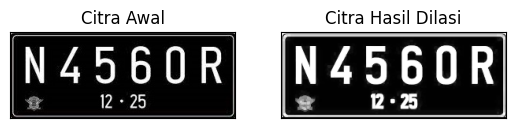

In [108]:
dilated_img = dilasi(img)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_img, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV.

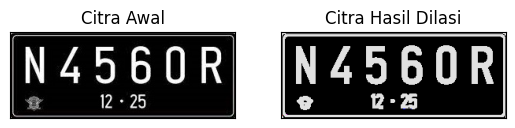

In [109]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)

dilated_img = cv.dilate(thresh, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

# Erosi

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV.

In [110]:
def erosi(image):

    # Buat SED cross 5x5
    sed = np.ones((5, 5), np.uint8)

    if len(image.shape) == 2:
        height, width = image.shape
        grayscale_image = image
    elif len(image.shape) == 3:
        height, width, channels = image.shape
        grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    for i in range(2, height-2):
        for j in range(2, width-2):
            region = grayscale_image[i-2:i+3, j-2:j+3]
            # Operasi erosi
            eroded_image[i, j] = 1 if np.all(region * sed == sed) else 0

    return eroded_image

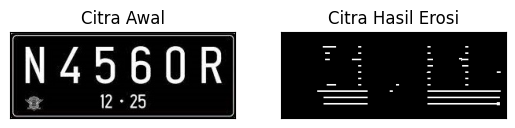

In [111]:
eroded_img = erosi(img)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(eroded_img, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([])
plt.yticks([])
plt.show()

Buatlah program implementasi operasi erosi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV.

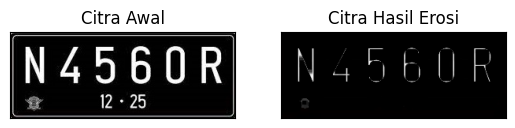

In [112]:
kernel = np.ones((5,5), np.uint8)
eroded_img = cv.erode(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(eroded_img, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

# Opening

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa menggunakan library morphology dari
openCV.

In [113]:
def opening(image, kernel_size):
    # Operasi Erosi
    eroded_image = erosi(image, kernel_size)

    # Operasi Dilasi
    opened_image = dilasi(eroded_image, kernel_size)

    return opened_image

In [114]:
# plt.subplot(121), plt.imshow(img, cmap = 'gray')
# plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(..., cmap = 'gray')
# plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
# plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 dengan menggunakan library morphology dari
openCV.

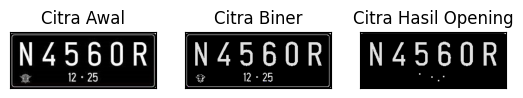

In [115]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
opened_img = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(opened_img, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

# Closing

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa menggunakan library morphology dari openCV.

In [116]:
# plt.subplot(131),plt.imshow(img, cmap = 'gray')
# plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
# plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
# plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 dengan menggunakan library morphology dari openCV.

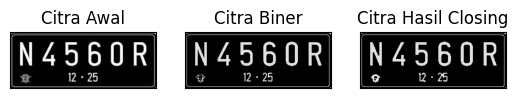

In [119]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
closed_img = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closed_img, cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5.

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5.

# Erosi

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7.

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5.

# Top Hat

# Black Hat

# Skeleton

# Skeleton Inverse

# Thickening

# **Tugas**